# DDS Workshop: Synthetic Data Evaluation with Anonymeter 🛡️

In today's data-driven landscape, the significance of synthetic data and anonymization techniques is undeniable. With the growing reliance on **Machine Learning (ML)** and **Deep Learning (DL)**, there's often a shortfall in accessible real-world data. **Synthetic Data Generation (SDG)** steps in to bridge this gap, allowing us to generate representative datasets for training models and for statistics insights. Moreover, while certain data might be available, it may not be public-ready due to its sensitive nature, limiting its utility when it comes to Data Science. Consider the vast realm of medical data: rife with sensitive information, yet essential for groundbreaking research.

## Evaluating Synthetic Data: A Multifaceted Challenge 🎯🔍

Assessing the quality and efficacy of synthetic datasets is far from straightforward. At its core, the evaluation process hinges on two primary pillars: **utility** (the dataset's ability to serve its intended purpose effectively) and **privacy**. While striving for high utility, it's imperative to strike a balance. Hence, there's an inherent trade-off between utility and privacy. While ensuring high utility is paramount, maintaining privacy is non-negotiable. 

In essence, the challenge lies in creating synthetic datasets that not only mirror real-world data distributions but also uphold stringent privacy standards.

## Turning Privacy Laws into Code: How Anonymeter Makes Legal Jargon Speak Tech 🏛️➡️💻
Assessing whether a synthetic dataset adheres to the stringent privacy constraints is no trivial task. While concepts like **Differential Privacy** provide a mathematical foundation for privacy assurance, they often lack intuitive interpretability. The true complexity emerges when attempting to convey these nuanced privacy assurances to non-technical people (lawyers, stakeholders, business leaders). Often, there's a palpable disconnect between the intricate world of data science and the broader understanding of privacy.

`Anonymeter` endeavors to translate the abstract notions of privacy assurance into tangible evaluations. Leveraging the tenets of the General Data Protection Regulation (**GDPR**), Anonymeter translates into code specific risks, such as ***Singling-Out***, ***Linkability*** and ***Inference***.

### Guidelines for the workshop

For this workshop, we will be exploiting the well-structured [Anonymeter GitHub repository](https://github.com/statice/anonymeter), by Anonos. This is the official open source code coupled with paper ["A Unified Framework for Quantifying Privacy Risk in Synthetic Data"](https://arxiv.org/abs/2211.10459).

To easily access and integrate this code, you can install the `anonymeter` package using the command
```bash
 pip install anonymeter
```

Moreover:
- We recommend that you complete this workshop using Colab, you can use your favorite notebook environment if you wish, but we won't be able to help with errors due to environment settings
- You will have sections marked **TO DO** that contain comments `#TODO` for you to fill in. You will be given time to complete the sections and we will discuss together. The instructions will be explained before each exercise.
- At any given moment, you can ask questions. **Please interreupt the speaker if you are unable to run the notebook**. You can also use the chat to ask questions and we will read the questions.

**!!! SKIP IF ALREADY EXECUTED !!!**

In [2]:
!pip install matplotlib==3.8.0
!pip install seaborn==0.13.0
!pip install numpy==1.23.5
!pip install pandas==1.5.3
!pip install anonymeter==0.0.2

ERROR: Could not find a version that satisfies the requirement matplotlib==3.8.0 (from versions: 0.86, 0.86.1, 0.86.2, 0.91.0, 0.91.1, 1.0.1, 1.1.0, 1.1.1, 1.2.0, 1.2.1, 1.3.0, 1.3.1, 1.4.0, 1.4.1rc1, 1.4.1, 1.4.2, 1.4.3, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 2.0.0b1, 2.0.0b2, 2.0.0b3, 2.0.0b4, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.0.2, 2.1.0rc1, 2.1.0, 2.1.1, 2.1.2, 2.2.0rc1, 2.2.0, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 3.0.0rc2, 3.0.0, 3.0.1, 3.0.2, 3.0.3, 3.1.0rc1, 3.1.0rc2, 3.1.0, 3.1.1, 3.1.2, 3.1.3, 3.2.0rc1, 3.2.0rc3, 3.2.0, 3.2.1, 3.2.2, 3.3.0rc1, 3.3.0, 3.3.1, 3.3.2, 3.3.3, 3.3.4, 3.4.0rc1, 3.4.0rc2, 3.4.0rc3, 3.4.0, 3.4.1, 3.4.2, 3.4.3, 3.5.0b1, 3.5.0rc1, 3.5.0, 3.5.1, 3.5.2, 3.5.3, 3.6.0rc1, 3.6.0rc2, 3.6.0, 3.6.1, 3.6.2, 3.6.3, 3.7.0rc1, 3.7.0, 3.7.1, 3.7.2, 3.7.3, 3.7.4)
ERROR: No matching distribution found for matplotlib==3.8.0
  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)
     |████████████████████████████████| 9.2 MB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 12.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(42)

## Load and visualize the dataset 📊

The dataset is the [FIFA22 complete player dataset](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset), publicly available on Kaggle. This dataset provides a detailed overview of football players stats, nationality, physical attributes, and age. In addition it shows aspects that would be deemed sensitive and private in a typical context, such as **annual wage**. 

By utilizing this dataset, we can effectively evaluate potential privacy leakages and understand the intricacies of data protection in real-world scenarios.

The initial dataset is made up of 110 features, from which we selected only 8, willingly excluding the most private attribute: the name.

In [10]:
path = 'https://raw.githubusercontent.com/venturintern/anonymeter-workshop/main/fifa.csv'
df_name = pd.read_csv(path)
df_name

,short_name,position,overall,wage_eur,age,height_cm,weight_kg,club_name,nationality_name
0,I. Lawlor,GoalKeeper,61,1000.0,26,193,80,Dundee FC,Republic of Ireland
1,G. Benavídez,Defense,65,3000.0,25,175,71,Arsenal de Sarandí,Argentina
2,Óscar,Midfield,75,21000.0,23,174,68,Sevilla FC,Spain
3,B. Bolla,Defense,64,10000.0,21,180,72,Grasshopper Club Zürich,Hungary
4,M. Kjaergaard,Midfield,62,2000.0,18,189,70,FC Red Bull Salzburg,Denmark
...,...,...,...,...,...,...,...,...,...
18082,F. Altamirano,GoalKeeper,66,3000.0,25,186,78,Club Atlético Banfield,Argentina
18083,J. Güemez,Defense,71,13000.0,29,176,80,Club Atlético de San Luis,Mexico
18084,D. Criscito,Defense,76,16000.0,34,183,75,Genoa,Italy
18085,L. Paolucci,Midfield,62,3000.0,24,174,66,Royale Union Saint-Gilloise,Italy


In [5]:
df = df_name.drop('short_name', axis=1)

### Display the dataset using seaborn.pairplot()
**TO DO:** Let's modify the variable `hue` to visualize data's dependence on the categorical variables

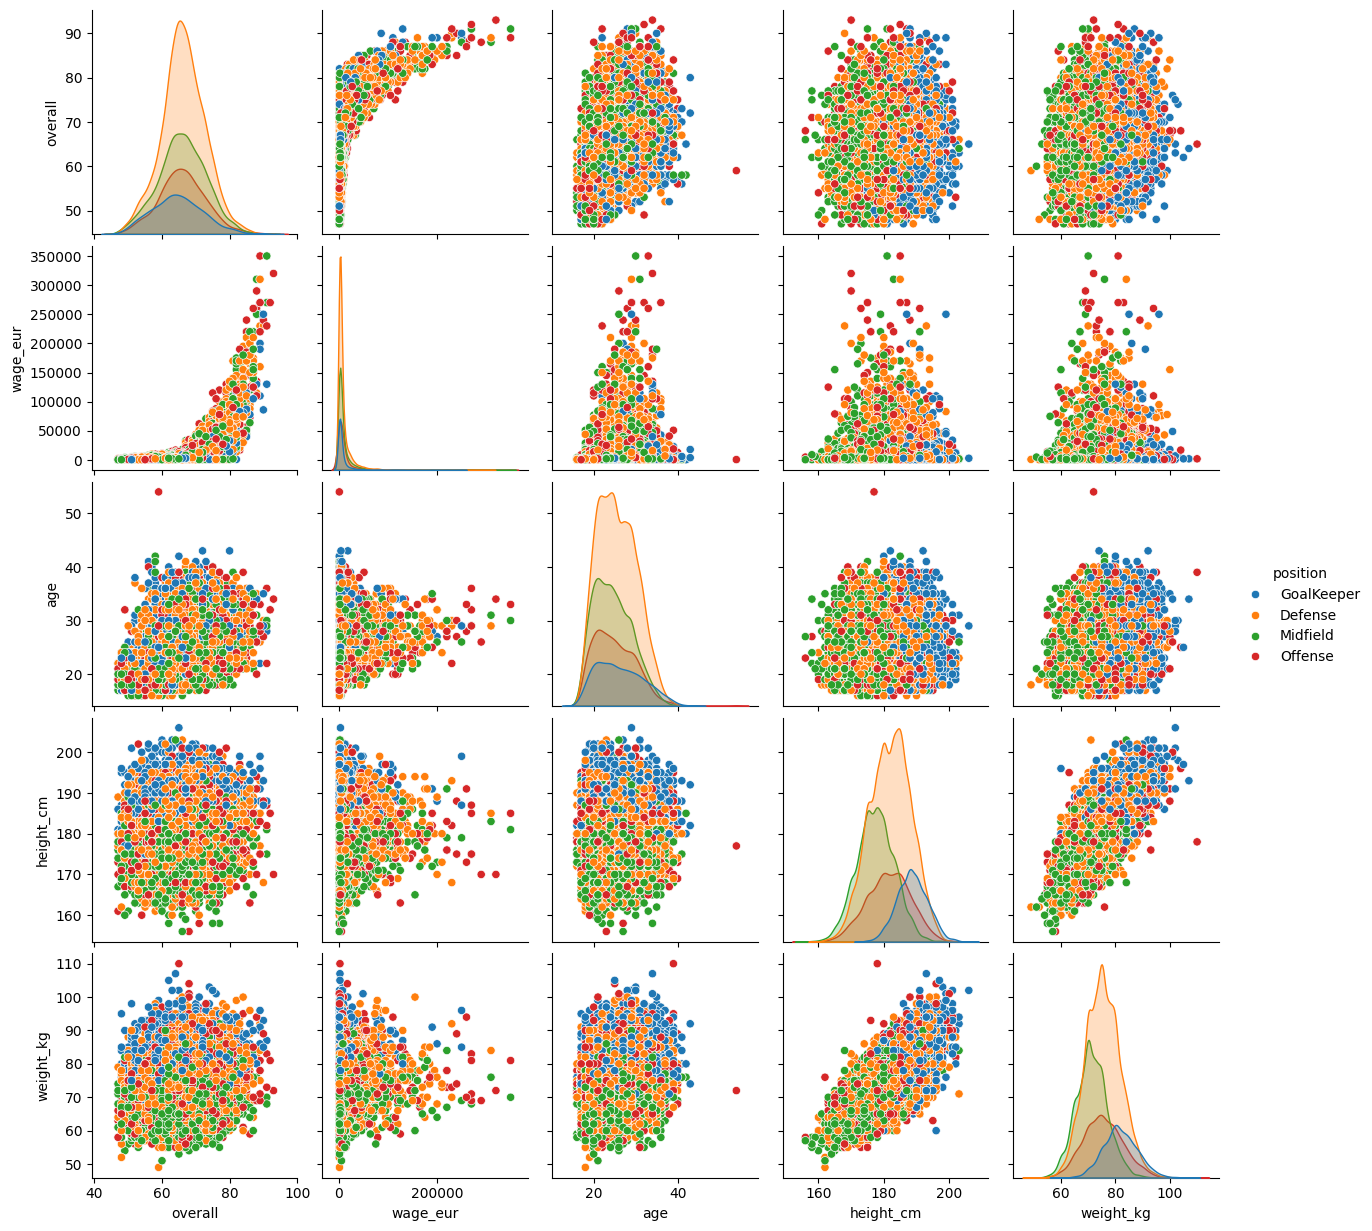

In [6]:
sns.pairplot(data=df, hue='position')
plt.show()

## Synthetic Datasets

We will work with synthetic datasets generated using three prominent libraries in the field:

1. **[SDV (Synthetic Data Vault)](https://github.com/sdv-dev)**: A leading open-source library for synthetic data generation. This library provides, among others, the `GaussianCopula` and `CTGAN` model.
 
2. **[SynthCity](https://github.com/vanderschaarlab/synthcity)**: This library enabled the implementation of `PrivBayes`, a well-known model for synthetic data generation exploiting Bayesian Networks and Causal Inference.

3. **[SmartNoise](https://github.com/opendp/smartnoise-sdk)**: This tool applies Differential Privacy to SDV's most famous model, CTGAN, transforming it into `DPCTGAN`.

In [11]:
df_dpctgan = pd.read_csv('https://raw.githubusercontent.com/venturintern/anonymeter-workshop/main/DPCTGAN_15000.csv')
df_privbayes = pd.read_csv('https://raw.githubusercontent.com/venturintern/anonymeter-workshop/main/privbayes_15000.csv')

df_gaussian = pd.read_csv('https://raw.githubusercontent.com/venturintern/anonymeter-workshop/main/GaussianCopula_15000.csv')
df_ctgan = pd.read_csv('https://raw.githubusercontent.com/venturintern/anonymeter-workshop/main/CTGAN_15000.csv')

## Synthetic Data Evaluation: `ANONYMETER`

`Anonymeter` contains privacy evaluators which measures the risks of ***Singling Out***, ***Linkability***, and ***Inference*** for a synthetic dataset. These risks are the three key indicators of factual anonymization according to the **European General Data Protection Regulation (GDPR)**.
 
For each of these privacy risks, `anonymeter` provides an `Evaluator` class: `SinglingOutEvaluator`, `LinkabilityEvaluator`, and `InferenceEvaluator`.

In [ ]:
from anonymeter.evaluators import SinglingOutEvaluator, LinkabilityEvaluator, InferenceEvaluator

In [ ]:
# HELPER FUNCTION

def print_results(results):

    print("Number of attacks:", results.n_attacks)
    print('\n')

    print("Number of successes for main attacks:", results.n_success)
    print("Successs rate of main attack:", results.attack_rate)
    print("Risk linked to the main attack: ", results.risk(baseline=False))
    print('\n')

    print("Number of successes for control attacks:", results.n_control)
    print("Successs rate of control attack:", results.control_rate)
    print('\n')

    print("Number of successes for baseline attacks:", results.n_baseline)
    print("Successs rate of baseline attack:", results.baseline_rate)
    print("Risk linked to the baseline attack: ", results.risk(baseline=True))

To instantiate the evaluator you have to provide three dataframes: the original dataset `ori` which has been used to generate the synthetic data, the synthetic data `syn`, and a `control` dataset containing original records which have not been used to generate the synthetic data.

In [ ]:
ori = df.iloc[:15000, :]
control = df.iloc[15000:, :]

# Choose the synthetic dataset you want to test
syn = df_privbayes

Another parameter common to all evaluators is the number of target records to attack (`n_attacks`).

Important distinction:
- **Generic information**: This is what an attacker can learn at a *population level*, it is what provides **utility** to the anonymized data
- **Specific information**: This is what an attacker can learn at an *individual level*, it enables the attacker to breach the **privacy**. 

To distinguish these two levels of information in a synthetic dataset, `anonymeter` runs three different attacks:
- the **main** privacy attack, in which the attacker uses the synthetic data to guess information on records in the original data. This attack should outperform random guessing in order for the results to be trusted. 
- the **control** privacy attack, in which the attacker uses the synthetic data to guess information on records in the control dataset. This attack is used to separate what the attacker learns from the utility of the synthetic data, and what is instead indication of privacy leaks.
- the **baseline** attack, which models a naive attacker who ignores the synthetic data and guess randomly. This attack is a sanity check.

Checking how many of these guesses are correct, the success rates of the different attacks are measured and used to derive an estimate of the privacy risk. 

<img src="./anonymeter_diagram.png" width="900" height="450">

## `Singling Out Risk` 🫵🏽

Singling out happens whenever it is possible to deduce that within the original dataset there is a single data record with a unique combination of one or more given attributes.

🚨 It is important to note that singling out does not imply re-identification. Yet the ability to isolate an individual is often enough to exert control on that individual, or to mount other privacy attacks.

🌳 What happens under the hood? The attacks are translated into code as queries, crafted using the synthetic dataset. These queries are then tested against the original dataset for validation.

1. **Queries Generation**:

  - **Baseline Attack**:
    - We randomly select a value from one (univariate) or more (multivariate) columns in the synthetic dataset.
    - Constructs a query based on this value, choosing an operator randomly from `==`, `!=`, `>`, `<`, `>=`, `<=` (accordingly to the type of the feature).
      As an example, we could have `position == GoalKeeper` or `age >= 29 AND club_name == Paris Saint Germain `
  
    Note: The number of queries generated isn't influenced by the synthetic dataset's characteristics since they're entirely random.

  - **Main Attack & Control Attack**:
   
    *i) Univariate*: For each column `col` in the synthetic dataset:
      - We check for a single `NaN` value and generate the query `col == NaN`.
      - If the column is numerical: we create two queries `col < min` and `col > max`.
      - We craft queries for rare values, i.e. values that appear only once in the column. Queries are generated as `col == rare_value` for each unique value.

    *ii) Multivariate*: While the required number of queries is not reached:
      - We randomly select an observation (row) from the synthetic dataset.
      - We randomly pick a combination of columns within this observation.
      - We construct a query incorporating the values of that observation in those columns, for instance `height_cm == 192 AND nationality_name == Spain`.
      - We check if the generated query uniquely identifies only one observation in the synthetic dataset (singling-out query).

2. **Validation on Real Dataset**:
   - We test if the generated attacks are effective on the real dataset, that is we check if the query identifies a unique observation in the real dataset.
   - If the attack is successful, indicating a potential data leakage of sensitive information, the query is added to the set of effective queries.


The `SinglingOutEvaluator` try to measure how much the synthetic data can help an attacker finding combination of attributes that singles out records in the training data. With the following code we evaluate the robustness of the synthetic data to `univariate` singling out attacks.

In [ ]:
# Parameters for the Univariate SinglingOutEvaluator
n_attacks = 500
evaluator_univ = SinglingOutEvaluator(ori=ori, syn=syn, control=control, n_attacks=n_attacks)

try:
    evaluator_univ.evaluate(mode='univariate')
    risk = evaluator_univ.risk()

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

In [ ]:
print_results(evaluator_univ.results())

The `SinglingOutEvaluator` can also attack the dataset using predicates which are combining different attributes. These are the so called `multivariate` predicates. The number of attributes used in the attacker queries via the `n_cols` parameter.

In [ ]:
# Parameters for the Multivariate SinglingOutEvaluator
n_attacks = 400
n_cols = 2

evaluator_multiv = SinglingOutEvaluator(ori=ori, syn=syn, control=control, n_attacks=n_attacks, n_cols=n_cols)

try:
    evaluator_multiv.evaluate(mode='multivariate')
    risk = evaluator_multiv.risk()

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

In [ ]:
print_results(evaluator_multiv.results())

#### ⚠️ The danger is real ⚠️

The singling out attack has allowed us to pinpoint specific queries that uniquely identify observations in the real dataset. This means that not only can we identify the attribute (or combination of attributes) that facilitated this identification, but we can potentially access all private data associated with these observations.

Let's consider both the univariate and multivariate cases by accessing the `._queries` attribute of the evaluator to print the successful queries during the attack. By doing so, we can identify the initial observations, gaining access to sensitive information such as the player's salary.

In [ ]:
univ_queries = evaluator_univ._queries
print("Successful Univariate Queries:", univ_queries)

In [ ]:
# TO DO
df_name[(df_name['age'] == 54) | (df_name['height_cm'] == 156)]

In [ ]:
multiv_queries = evaluator_multiv._queries
print("Successful Multivariate Queries:", multiv_queries)

In [ ]:
# TO DO
df_name[(df_name['club_name'] == 'FC Barcelona') & (df_name['age'] >= 34)]

## `Linkability Risk` 🪢

Linkability is the possibility of linking together two or more records (either in the same dataset or in different ones) belonging to the same individual or group of individuals: it can be used for de-anonymization. Due to statistical similarities between the generated data and the original data, linkability risks may still exist in synthetic datasets.

🌳 What happens under the hood? As described above, let's assume the attacker has access to datasets A and B, which each contain, among others, certain columns from the real dataset. The attacks are translated into code using two matrices of dimensions (n_attacks, n_neighbors), corresponding to datasets **A** and **B** respectively.

1. **Generation of the attacks**:

    - **Baseline Attack**: in the naive approach, nearest neighbors' indices are randomly chosen, meaning that both matrices are populated with random indices of observations from the synthetic dataset.

    - **Main Attack & Control Attack**: For each row in each of the matrices, there corresponds an attack targeting an observation from the real dataset (randomly selected, but the same real observations for both **A** and **B**). For each attack (thus for each row), there are `n_neighbors` indices of observations from the synthetic dataset, indicating the nearest neighbors of the real observation in the synthetic dataset.

2. **Evaluation of Attack Success**: If the intersection of indices from the corresponding rows in both matrices is non-empty, it indicates a successful link. Specifically, a synthetic sample that links the same real observation in both datasets **A** and **B** has been identified.

### Linkability Attack Visualization

**General Framework**: The plot consists of 3 rows and 2 columns, representing two datasets, **A** and **B**. The actions occur simultaneously and identically in both columns.

- ***First Row***: We visualize **synthetic data** points in a 2D space. Each point is assigned a different color based on the total number of points (🟡🟢🔵).

- ***Second Row***: We locate the **observation from the original dataset** (🔴) intended for the linking attack. Additionally, we identify its **nearest neighbors** within the synthetic dataset.

- ***Third Row***: We focus on identifying **common nearest neighbors** within the datasets A and B for the observation chosen in the second row. Visually, this involves checking if there are nearest neighbors with the same color in both datasets. 

<img src="./link_attack.png" width="1600" height="1000">

The `LinkabilityEvaluator` allows one to know how much the synthetic data will help an adversary who tries to link two other datasets based on a subset of attributes. For example, suppose that the adversary finds dataset **A** containing, among other fields, information about the `height_cm`, `weight_kg` and `nationality_name` of FIFA football players, and dataset **B** containing some game-related information (`position` and `club_name`, for example). 

Can the attacker use the synthetic dataset to link these two datasets? 
To run the this attack, one needs to specify which columns of auxiliary information are available to the attacker, and how they are distributed between the two datasets **A** and **B**. This is done using the `aux_cols` parameter.

In [ ]:
# Parameters for the LinkabilityEvaluator
n_attacks = 2000
aux_cols = [['height_cm', 'weight_kg', 'nationality_name'],
            ['overall', 'age', 'club_name']]

n_neighbors = 10

evaluator = LinkabilityEvaluator(ori=ori, syn=syn, control=control,
                                 n_attacks=n_attacks, aux_cols=aux_cols, n_neighbors=n_neighbors)

evaluator.evaluate(n_jobs=-1)  # n_jobs follow joblib convention. -1 = all cores, -2 = all execept one

In [ ]:
print_results(evaluator.results())

### Unmasking Connections Across Datasets

Let's try on our own and test the real danger of a Linkability Attack! 

In [ ]:
# HELPER FUNCTIONS 

from anonymeter.neighbors.mixed_types_kneighbors import MixedTypeKNeighbors
from typing import cast, Dict, Set

def _find_nn(syn: pd.DataFrame, ori: pd.DataFrame, n_jobs: int, n_neighbors: int) -> np.ndarray:
    nn = MixedTypeKNeighbors(n_jobs=n_jobs, n_neighbors=n_neighbors)

    if syn.ndim == 1:
        syn = syn.to_frame()

    if ori.ndim == 1:
        ori = ori.to_frame()

    nn.fit(syn)

    return cast(np.ndarray, nn.kneighbors(ori, return_distance=False))

def find_links(idx_0, idx_1, n_neighbors: int) -> Dict[int, Set[int]]:
    """Return synthetic records that link originals in the split datasets.

    Parameters
    ----------
    n_neighbors : int
        Number of neighbors considered for the link search.

    Returns
    -------
    Dict[int, Set[int]]
        Dictionary mapping the index of the linking synthetic record
        to the index of the linked original record.

    """

    links = {}
    for ii, (row0, row1) in enumerate(zip(idx_0, idx_1)):
        joined = set(row0[:n_neighbors]) & set(row1[:n_neighbors])
        if len(joined) > 0:
            links[ii] = joined

    return links

In [ ]:
# Parameters for the LinkabilityEvaluator
aux_cols = [['height_cm', 'weight_kg', 'nationality_name'],
            ['overall', 'age', 'club_name']]
n_neighbors = 10

np.random.seed(42)
targets = ori.sample(1000)

A, B = targets[aux_cols[0]], targets[aux_cols[1]]
syn_A, syn_B = syn[aux_cols[0]], syn[aux_cols[1]]

idx_a = _find_nn(syn=syn_A, ori=A, n_neighbors=5, n_jobs=-1)
idx_b = _find_nn(syn=syn_B, ori=B, n_neighbors=5, n_jobs=-1)

links = find_links(idx_0=idx_a, idx_1=idx_b, n_neighbors=n_neighbors)
print(links)

In [ ]:
# Original (partial) observations that have been linked
AB = pd.concat([A.iloc[list(links.keys())],
                B.iloc[list(links.keys())],],
                axis=1,
                keys=['A', 'B'])
AB

In [ ]:
# Synthetic linking observations
vals = [list(i)[0] for i in links.values()]
syn.iloc[vals]

In [ ]:
idx = targets.iloc[list(links.keys())].index
df_name.iloc[idx]

### `Inference Risk` 🎯

Inference happens when an attacker can confidently guess (infer) the value of an unknown attribute of the original data record.

`Anonymeter` quantifies the inference risk by measuring the success of an attacker that tries to discover the value of some secret attribute for a set of target records on which some auxiliary knowledge is available.

🌳 What happens under the hood? We sample `n_attacks` observations from the original dataset. Considering all the columns in the dataset (real or synthetic, as the columns are the same), some are chosen as regressors, while one is selected as the target (identified as `secret`).

1. **Generation of the attacks**:

    - **Baseline Attack**: In this attack, `n_attacks` values of the `secret` column are randomly selected from the synthetic dataset and used as guesses for inference on the real dataset.

    - **Main and Control Attacks**: Given the previously selected real sample, the nearest neighbor within the synthetic dataset is identified, and its `secret` attribute is used as an inference guess.

2. **Evaluation of Attack Success**: The evaluation of the attack is quite intuitive: a guess is considered correct if:
    - in the case of a categorical variable: the class is correct
    - in the case of a numerical variable: the relative difference between the predicted and actual values is below a tolerance threshold (5%)


Similar to the case of the Linkability Risk, the main parameter here is `aux_cols` which specify what the attacker knows about its target, i.e. which columns are known to the attacker. By selecting the `secret` column, one can identify which attributes, alone or in combinations, exhibit the largest risks and thereby expose a lot of information on the original data.

In the following snippet we will measure the inference risk for each column individually, using all the other columns as auxiliary information to model a very knowledgeable attacker. 

In [ ]:
columns = ori.columns

# Parameters for InferenceEvaluator
n_attacks = 1000

secret = 'wage_eur'
aux_cols = [col for col in columns if col != secret]

evaluator = InferenceEvaluator(ori=ori, syn=syn, control=control,
                                   aux_cols=aux_cols, secret=secret, n_attacks=n_attacks)
evaluator.evaluate(n_jobs=-1)

In [ ]:
print("Inference attack for the variable ", secret)
print_results(evaluator.results())

## What about `Differential Privacy`?

As we approach the conclusion of the workshop, some key questions remains unanswered: 
 
- Are the guarantees provided by DP **truly effective** in safeguarding a dataset against attacks implemented by `anonymeter`?
- Does the introduction of **noise** during the generation of synthetic data effectively protect the original data? 

Essentially, we are questioning whether there is a **tangible privacy gain at the expense of a natural reduction in utility**.

If so, prioritizing methods incorporating Differential Privacy in data generation would make sense. Otherwise, it might be reasonable to favor standard methods.

Let's re-run the three attacks on each of the synthetic datasets and save the results for subsequent visualization.

⏳ **Since the execution of this cell might take a little time, feel free to address any questions, doubts, or curiosities you may have!** ⏳

In [ ]:
synthetic_datasets = [df_gaussian, df_privbayes, df_ctgan, df_dpctgan]
model_names = ['GaussianCopula', 'PrivBayes', 'CTGAN', 'DPCTGAN']

# Parameters
n_attacks_single = 500
n_cols = 2

n_attacks_link = 1000
aux_cols_link = [['height_cm', 'weight_kg', 'nationality_name'], ['overall', 'age', 'club_name']]
n_neighbors = 8

n_attacks_infer = 2000
columns = ori.columns
secret = 'wage_eur'
aux_cols_infer = [col for col in columns if col != secret]

results = {'Singling Out' : {},
           'Linkability' : {},
           'Inference' : {}}

for i, syn in enumerate(synthetic_datasets):

    # Multivariate Singling-Out
    evaluator_single = SinglingOutEvaluator(ori=ori, syn=syn, control=control, n_attacks=n_attacks_single, n_cols=n_cols)
    evaluator_single.evaluate(mode='multivariate')
    results['Singling Out'][model_names[i]] = [evaluator_single.results().attack_rate, evaluator_single.results().control_rate]
    
    # Linkability
    evaluator_link = LinkabilityEvaluator(ori=ori, syn=syn, control=control, n_attacks=n_attacks_link, aux_cols=aux_cols_link, n_neighbors=n_neighbors)
    evaluator_link.evaluate(n_jobs=-1)  # n_jobs follow joblib convention. -1 = all cores, -2 = all execept one
    results['Linkability'][model_names[i]] = [evaluator_link.results().attack_rate, evaluator_link.results().control_rate]

    # Inference
    evaluator_infer = InferenceEvaluator(ori=ori, syn=syn, control=control, aux_cols=aux_cols_infer, secret=secret, n_attacks=n_attacks_infer)
    evaluator_infer.evaluate(n_jobs=-1)
    results['Inference'][model_names[i]] = [evaluator_infer.results().attack_rate, evaluator_infer.results().control_rate]

In [12]:
# HELPER FUNCTION
def print_comparison(results, model_names):
    
    values = []
    errors = []

    for i, attack in enumerate(results.keys()):
        for j, model in enumerate(model_names):
            values.append(results[attack][model][0].value)
            errors.append(results[attack][model][0].error)
        
        data = results[attack]

        values_main = [data[model][0].value for model in model_names]
        errors_main = [data[model][0].error for model in model_names]

    df = pd.DataFrame({
        'Attack': ['Singling Out'] * len(model_names) + ['Linkability'] * len(model_names) + ['Inference'] * len(model_names),
        'Model': len(results) * model_names,
        'Value': values,
        'Lower CI': [values[k]-errors[k] for k in range(len(values))],
        'Upper CI': [values[k]+errors[k] for k in range(len(values))]
    })

    plt.figure(figsize=(12, 6))

    barplot = sns.barplot(x='Attack', y='Value', hue='Model', data=df,)
    bar_centers = [patch.get_x() + patch.get_width() / 2 for patch in barplot.patches]
    plt.errorbar(x=sorted(bar_centers[:df.shape[0]]), y=values, yerr=errors, fmt='none', color='k', capsize=5)

    plt.xlabel('Attack Type')
    plt.ylabel('Succes Rate')
    plt.title('Success Rates of Attacks and 95% CIs')
    plt.legend(title='Model', bbox_to_anchor=(1, 1))

    plt.show()


In [ ]:
print_comparison(results, model_names)